In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 600

In [3]:
# Seta a visualização para não cientifica e coloca ',' como separador de milhar
pd.options.display.float_format = '{:,.2f}'.format

# Importação das Bases de Dados

Fonte: http://www.rio.rj.gov.br/web/contasrio/dados-abertos#titulo

In [30]:
despesa_22 = pd.read_csv('http://riotransparente.rio.rj.gov.br/arquivos/Open_Data_Rec_2022.csv', sep=',', encoding='latin1', decimal=',')

In [28]:
despesa_23 = pd.read_csv('http://riotransparente.rio.rj.gov.br/arquivos/Open_Data_Rec_2023.csv', sep=',', encoding='latin1', decimal=',')

In [31]:
empenho_22 = pd.read_csv('http://riotransparente.rio.rj.gov.br/arquivos/Open_Data_Empenhos_2023.csv', sep=';', encoding='latin1', decimal=',')

In [32]:
empenho_23 = pd.read_csv('http://riotransparente.rio.rj.gov.br/arquivos/Open_Data_Empenhos_2023.csv', sep=';', encoding='latin1', decimal=',')

In [5]:
#despesa_22 = pd.read_csv('data/Data_Desp_2022.csv', sep=',', encoding='latin1', decimal=',')

In [6]:
#despesa_23 = pd.read_csv('data/Data_Desp_2023.csv', sep=',', encoding='latin1', decimal=',')

In [23]:

#empenho_22 = pd.read_csv('data/Data_Empenhos_2022.csv', sep=';', encoding='latin1', decimal=',')

In [24]:
#empenho_23 = pd.read_csv('data/Data_Empenhos_2023.csv', sep=';', encoding='latin1', decimal=',')

In [7]:
#concatena os DataFrames
despesa = pd.concat([despesa_22, despesa_23])

In [25]:
empenho = pd.concat([empenho_22, empenho_23])

# Análise das Despesas por ações de interesse

In [33]:
despesa_acao = (
    despesa
    .groupby(['Exercicio','Acao', 'Descricao_Acao', 'Elemento_Despesa',
              'Descricao_Elemento','Item_Despesa', 'Descricao_Item_Despesa'])
    .agg({
        'Orcamento_Atualizado' : 'sum',
        'Empenhado' : 'sum',
        'Liquidado' : 'sum',
    })
    .reset_index()
)

In [34]:
acoes_interesse = [4638, 2081, 2136, 2986, 2117, 2222, 2515,
                   2030, 2133, 2988, 1330, 1331, 2935, 2947,
                   2910, 2916, 1335, 2027, 1347, 2914, 3105,
                   1325, 1320, 1322, 1321, 2950, 1357, 2907]

O que saber por ação?
-Quanto foi orçado na LOA, Quanto foi empenhado e liquidado -> Tabela

-Composição do gasto por Descricao_elemento
-Se solicitado, podemos descer até Item despesa

In [35]:
acoes = [4638, 2081, 2136]
nivel = 'Elemento_Despesa'

In [36]:
def df_acao(df, acao):
    df = (
    df
    .query('Acao == @acao')
    )
    return df

In [37]:
def sumario_acao(df):
    sumario = (
        df
        .groupby(['Exercicio'])
        .agg({
            'Orcamento_Atualizado' : 'sum',
            'Empenhado' : 'sum',
            'Liquidado' : 'sum',
        })
        .reset_index()
    )
    
    return sumario

In [38]:
def itens_acao(df, nivel):
    df = (
        df
        .groupby(['Exercicio', nivel])
        .agg({
            'Orcamento_Atualizado' : 'sum',
            'Empenhado' : 'sum',
            'Liquidado' : 'sum',
        })
        .reset_index()
    )
    df = df[df['Orcamento_Atualizado']>0]
    
    #df_long = pd.melt(df, id_vars=['Exercicio','Elemento_Despesa', 'Descricao_Elemento'], value_vars=['Orcamento_Atualizado', 'Empenhado', 'Liquidado'])
    
    return df

In [39]:
def graph_itens(df,acao,nivel, figsize, label):
    sns.set_theme(style="whitegrid")
    f, ax1 = plt.subplots(figsize=figsize)
    

    #2022
    df_1 = df[df['Exercicio']==2022]

    # Plot LOA
    sns.barplot(
        data = df_1,
        x='Orcamento_Atualizado',
        y=nivel,
        label="LOA",
        color="#9B9987",
        ax=ax1)
    
    # Plot Empenhado   
    sns.barplot(
        data = df_1,
        x='Empenhado',
        y=nivel,
        label="Empenhado",
        color="#685762",
        ax=ax1)
    
    # Plot Liquidação  
    sns.barplot(
        data = df_1,
        x='Liquidado',
        y=nivel,
        label="Liquidado",
        color="#190B28",
        ax=ax1)
  
    
    
    ax1.legend(ncol=1, loc="lower right", frameon=False, bbox_to_anchor=(1.4, 0))
    ax1.set(
        ylabel="",
        xlabel=label,
    )
    ax1.tick_params(axis='both', labelsize=7,)
    ax1.ticklabel_format(style='sci', axis='x', scilimits=(6,6))
    plt.title(f'Composicão das Despesas da ação {acao} do ano 2022', x=0)
    #plt.close()
    return f

In [40]:
# Função de análise de ação
def analise_acao(acao, nivel='Descricao_Elemento', figsize=(6,1.5), label='R$ Milhões'):
    df = df_acao(despesa_acao, acao)
    sumario = sumario_acao(df)
    df_itens = itens_acao(df, nivel)
    graph_itens(df_itens,acao, nivel, figsize, label)
    display(sumario)
    display(df_itens)
    

,Exercicio,Orcamento_Atualizado,Empenhado,Liquidado
0,2022,"15,327,107.21","14,639,131.62","13,948,172.04"
1,2023,"12,306,730.40","12,306,730.40","901,591.72"


,Exercicio,Descricao_Elemento,Orcamento_Atualizado,Empenhado,Liquidado
0,2022,OUTROS SERVICOS DE TERCEIROS - PESSOA FISICA ...,"15,317,963.81","14,629,988.22","13,945,869.24"
1,2022,OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDICA...,"9,143.40","9,143.40","2,302.80"
2,2023,OUTROS SERVICOS DE TERCEIROS - PESSOA FISICA ...,"12,292,328.00","12,292,328.00","901,388.20"
3,2023,OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDICA...,"14,402.40","14,402.40",203.52


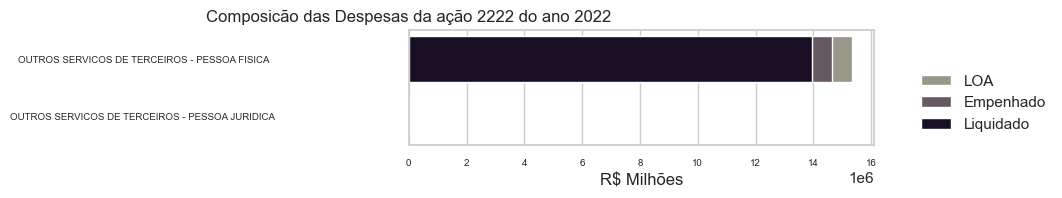

In [41]:
analise_acao(2222)

# Análise de prestadores de serviços por Orgão

In [27]:
empenho.head(2)

,Órgão executor,Descrição do órgão executor,Exercício do empenho,Número do empenho,Data do empenho,Órgão programa de trabalho,Unidade programa de trabalho,Processo do empenho,Tipo de favorecido,Código do favorecido,Favorecido,Valor empenhado,Valor liquidado,Valor pago,Programa de trabalho,Descrição do programa de trabalho,Natureza da despesa,Descrição da natureza da despesa,Fonte de recursos,Descrição da fonte de recursos,Espécie,Coletivo,Obrigação futura,Entrega imediata,Modalidade de licitação,Fundamentação legal,Tipo do instrumento contratual,Ano do instrumento contratual,Número do instrumento contratual,Situação do instrumento contratual,Início previsto do instrumento contratual,Fim previsto do instrumento contratual,Objeto do instrumento contratual,Valor do instrumento contratual,Banco pagador,Agência pagadora,Conta pagadora
0,1000,Secretaria Municipal de Governo e Integridade ...,2022,1,02/01/2022,10,1,100058112021,PESSOA JURIDICA,"33,593,575,000,114.00",MITRA ARQUIEPISCOPAL DO RIO DE JANEIRO,"250,000.00","250,000.00","250,000.00",10.01.04.122.0389.2022,APOIO A EVENTOS E PROJETOS,33903917,"SERVICOS PARA FINS EDUCATIVOS, CULTURAIS E SOC...",100,ORDINARIOS NAO VINCULADOS ...,Estimativo,N,S,S,Inexigibilidade,ARTIGO 25 INCISO CAPUT DA LEI 8666 DE 21/06/93...,Contrato,"2,022.00","10,001.00",ENCERRADO,04/02/2022,01/03/2022,REGER O PATROCÍNIO CONCEDIDO PELO MUNICÍPIO EM...,"250,000.00",1,2234,2951983
1,1000,Secretaria Municipal de Governo e Integridade ...,2022,2,02/01/2022,10,1,10012642019,ORGAO,"1,000.00",Secretaria Municipal de Governo e Integridade ...,"69,997.65","69,997.65","69,997.65",10.01.04.122.0389.2169,APOIO ADMINISTRATIVO - GOVERNANCA,33903941,TAXI.RIO - USO CORPORATIVO,100,ORDINARIOS NAO VINCULADOS ...,Ordinario,N,N,S,Não Sujeito,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1,2234,2951983


In [40]:
def analise_palavra(palavra, df=empenho):
    filtro = df.apply(lambda row: row.astype(str).str.contains(palavra, case=False).any(), axis=1)
    return df[filtro]

In [50]:
def analise_palavra(palavra, df=empenho):
    df = df[df.apply(lambda row: row.astype(str).str.contains(palavra, case=False).any(), axis=1)]
    return df

In [108]:
def analise_executor(executor, df=empenho):
    df = df[df['Órgão executor']==executor]
    
    df = (
        df
        .groupby(['Exercício do empenho', 'Descrição do órgão executor',
                   'Órgão programa de trabalho',
                   'Descrição do programa de trabalho',
                   'Código do favorecido', 'Favorecido',
                   'Descrição da fonte de recursos',
                   'Descrição da natureza da despesa',
                   'Fundamentação legal',
                   'Objeto do instrumento contratual'])
        .agg({
            'Valor empenhado' : 'sum',
            'Valor liquidado' : 'sum',
        })
        .reset_index()
    )
    df = df[df['Valor empenhado']>0]
    df = df.sort_values(by=['Valor empenhado'], ascending=False)

    return df

In [104]:
def analise_orgao(orgao, df=empenho):
    df = df[df['Órgão programa de trabalho']==orgao]
    
    df = (
        df
        .groupby(['Exercício do empenho', 'Descrição do órgão executor',
                   'Órgão programa de trabalho',
                   'Descrição do programa de trabalho',
                   'Código do favorecido', 'Favorecido',
                   'Descrição da fonte de recursos',
                   'Descrição da natureza da despesa',
                   'Fundamentação legal',
                   'Objeto do instrumento contratual'])
        .agg({
            'Valor empenhado' : 'sum',
            'Valor liquidado' : 'sum',
        })
        .reset_index()
    )
    df = df[df['Valor empenhado']>0]
    df = df.sort_values(by=['Valor empenhado'], ascending=False)

    return df


In [96]:
def analise_prestadores(orgao=None, executor=None, palavra=None, df=empenho, save=False,):
    if palavra:
        df = analise_palavra(palavra, df)

    if orgao:
        df = analise_orgao(orgao, df)
    
    if executor:
        df = analise_executor(executor, df)

    df = df.sort_values(by=['Valor empenhado'], ascending=False)
    
    if save:
        df.to_csv(f'output/analise_prestadores_{orgao}.csv', index=False)

    return df

In [107]:
analise_prestadores(orgao=18, palavra='mental' ,save=False)

,Exercício do empenho,Descrição do órgão executor,Órgão programa de trabalho,Descrição do programa de trabalho,Código do favorecido,Favorecido,Descrição da fonte de recursos,Descrição da natureza da despesa,Fundamentação legal,Objeto do instrumento contratual,Valor empenhado,Valor liquidado
6,2023,Secretaria Municipal de Saúde,18,ACOES DE DESINSTITUCIONALIZACAO EM SAUDE MENTAL,"2,680,126,000,180.00",CENTRO INTEGRADO DE ESTUDOS E PROGRAMAS DE DESENVOLVIMENTO SUSTENTAVEL,TRANSFERENCIAS FUNDO A FUNDO DE RECURSOS DO SUS PROVENIENTES DO GOVERNO FEDERAL - BLOCO DE,"SERVICOS DE GER., OPERAC. E EXEC. DE ATIVIDADES DIRIGIDAS A SAUDE, PRESTADOS POR OSC",ARTIGO 16 INCISO CAPUT DA LEI 13019 DE 31/07/14 E SUAS ALTERACOES,"GERENCIAMENTO, OPERACIONALIZAÇÃO E EXECUÇÃO DAS AÇÕES PARA MANUTENÇÃO E IMPLANTAÇÃO DOS SERVIÇOS RESIDENCIAIS TERAPEUTICOS NO ÂMBITO DO MUNICIPIO DO RIO DE JANEIRO","51,459,139.52","39,769,318.08"
1,2023,Empresa Pública de Saúde do Rio de Janeiro S/A,18,MANUTENCAO DO CUSTEIO DA REDE HOSPITALAR - ADM. INDIRETA,"7,028,841,000,156.00",DE SA SERVICOS LTDA,OUTRAS VINCULACOES DE TRANSFERENCIAS,SERVICOS DE MAQUEIROS EM UNIDADES DA SECRETARIA MUNICIPAL DE SAUDE,ARTIGO 29 INCISO III DA LEI 13303 DE 30/06/16 E SUAS ALTERACOES,"PRESTAÇÃO DE SERVIÇOS DE MAQUEIRO, COM ENSINO FUNDAMENTAL COMPLETO, QUE ATUARÁ NO TRANSPORTE DE LOCOMOÇÃO E/OU MOVIMENTAÇÃO DE PACIENTES, E CADÁVERES, ESCALA DE DOMINGO A DOMINGO, INCLUINDO PONTOS FACULTATIVOS E FERIADOS, DAS 7H ÀS 19H E 19H ÀS 7H, PARA ATENDIMENTO NAS UNIDADES DE PRONTO ATENDIMENTO UPA ENGENHO DE DENTRO, UPA MADUREIRA, UPA COSTA BARROS, UPA ROCHA MIRANDA, UPA JOÃO XXIII, UPA SEPETIBA, UPA PACIÊNCIA, UPA VILA KENNEDY, UPA MAGALHÃES BASTOS, UPA SENADOR CAMARÁ, UPA CIDADE DE DEUS E HOSPITAL MUNICIPAL ROCHA FARIA HMRF","8,075,040.00","2,529,461.40"
5,2023,Instituto Municipal de Assistência à Saúde Nise da Silveira,18,MANUTENCAO DA REDE DE ATENCAO PSIQUIATRICA,"47,078,019,000,114.00",HOSPITAL MAHATMA GANDHI,TRANSFERENCIAS FUNDO A FUNDO DE RECURSOS DO SUS PROVENIENTES DO GOVERNO FEDERAL - BLOCO DE,"SERVICOS DE GER., OPERAC. E EXEC. DE ATIVIDADES DIRIGIDAS A SAUDE, PRESTADOS POR OSC",ARTIGO 16 INCISO CAPUT DA LEI 13019 DE 31/07/14 E SUAS ALTERACOES,"GERENCIAMENTO E EXECUÇÃO DE AÇÕES DE ASISTÊNCIA EM SAÚDE MENTAL, REABILITAÇÃO PSICOSSOCIAL E PROMOÇÃO DE SAÚDE MENTAL NO ÂMBITO DO INSTITUTO MUNICIPAL NISE DA SILVEIRA E DOS SERVIÇOS QUE COMPÕEM A REDE DE ATENÇÃO PSICOSSOCIAL DA ZONA NORTE (APS 3.1, 3.2 E 3.3)","7,399,796.40","6,166,497.00"
3,2023,Instituto Municipal de Assistência à Saúde Juliano Moreira,18,ACOES DE ATENCAO PSICOSSOCIAL,"2,680,126,000,180.00",CENTRO INTEGRADO DE ESTUDOS E PROGRAMAS DE DESENVOLVIMENTO SUSTENTAVEL,TRANSFERENCIAS FUNDO A FUNDO DE RECURSOS DO SUS PROVENIENTES DO GOVERNO FEDERAL - BLOCO DE,"SERVICOS DE GER., OPERAC. E EXEC. DE ATIVIDADES DIRIGIDAS A SAUDE, PRESTADOS POR OSC",ARTIGO 16 INCISO CAPUT DA LEI 13019 DE 31/07/14 E SUAS ALTERACOES,"TERMO DE COLABORAÇÃO QUE TEM POR OBJETO O APOIO A EXECUÇÃO DE AÇÕES DO INSTITUTO MUNICIPAL JULIANO MOREIRA, EM CONSONÂNCIA COM AS LEIS E DIRETRIZES EM SAÚDE MENTAL DO MUNICÍPIO DO RIO DE JANEIRO","4,373,796.06","3,151,319.42"
2,2023,Instituto Municipal de Assistência à Saúde Juliano Moreira,18,ACOES DE ATENCAO PSICOSSOCIAL,"2,680,126,000,180.00",CENTRO INTEGRADO DE ESTUDOS E PROGRAMAS DE DESENVOLVIMENTO SUSTENTAVEL,RECURSOS NAO VINCULADOS DE IMPOSTOS,"SERVICOS DE GER., OPERAC. E EXEC. DE ATIVIDADES DIRIGIDAS A SAUDE, PRESTADOS POR OSC",ARTIGO 16 INCISO CAPUT DA LEI 13019 DE 31/07/14 E SUAS ALTERACOES,"TERMO DE COLABORAÇÃO QUE TEM POR OBJETO O APOIO A EXECUÇÃO DE AÇÕES DO INSTITUTO MUNICIPAL JULIANO MOREIRA, EM CONSONÂNCIA COM AS LEIS E DIRETRIZES EM SAÚDE MENTAL DO MUNICÍPIO DO RIO DE JANEIRO","2,444,953.28",0.00
4,2023,Instituto Municipal de Assistência à Saúde Juliano Moreira,18,MANUTENCAO DA REDE DE ATENCAO PSIQUIATRICA,"2,680,126,000,180.00",CENTRO INTEGRADO DE ESTUDOS E PROGRAMAS DE DESENVOLVIMENTO SUSTENTAVEL,TRANSFERENCIAS FUNDO A

In [94]:
empenho.head(2)

,Órgão executor,Descrição do órgão executor,Exercício do empenho,Número do empenho,Data do empenho,Órgão programa de trabalho,Unidade programa de trabalho,Processo do empenho,Tipo de favorecido,Código do favorecido,Favorecido,Valor empenhado,Valor liquidado,Valor pago,Programa de trabalho,Descrição do programa de trabalho,Natureza da despesa,Descrição da natureza da despesa,Fonte de recursos,Descrição da fonte de recursos,Espécie,Coletivo,Obrigação futura,Entrega imediata,Modalidade de licitação,Fundamentação legal,Tipo do instrumento contratual,Ano do instrumento contratual,Número do instrumento contratual,Situação do instrumento contratual,Início previsto do instrumento contratual,Fim previsto do instrumento contratual,Objeto do instrumento contratual,Valor do instrumento contratual,Banco pagador,Agência pagadora,Conta pagadora
0,1000,Secretaria Municipal de Governo e Integridade Pública,2023,1,01/01/2023,10,1,990012052023,ORGAO,"1,000.00",Secretaria Municipal de Governo e Integridade Pública,249.43,249.43,249.43,10.01.04.122.0389.2529,PROVISAO DE GASTOS COM PESSOAL - GOVERNANCA,31904901,AUXILIO-TRANSPORTE,1500100,RECURSOS NAO VINCULADOS DE IMPOSTOS,Ordinario,N,N,S,Não Sujeito,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1,2234,2951983
1,1000,Secretaria Municipal de Governo e Integridade Pública,2023,2,02/01/2023,10,1,10008532020,PESSOA JURIDICA,"104,659,000,198.00",HADDAD RENT A CAR LOCADORA LTDA,"122,271.75","122,271.75","122,271.75",10.01.04.122.0389.2169,APOIO ADMINISTRATIVO - GOVERNANCA,33903996,LOCACAO DE VEICULOS DE REPRESENTACAO E OPERACIONAL,1500100,RECURSOS NAO VINCULADOS DE IMPOSTOS,Estimativo,N,S,S,Pregão,ARTIGO 1 INCISO CAPUT DA LEI 10520 DE 17/07/02 E SUAS ALTERACOES,Termo de Execução,"2,021.00","1,111.00",ATIVO,02/01/2021,23/05/2023,TRANSFERÊNCIA DE DESPESA DO ÓRGÃO 1100 PARA O ÓRGÃO 1000 CONFORME DECRETO Nº 48.340 DE 01/01/2021.,"2,009,540.13",1,2234,2951983
